In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
stress10_df = pd.read_csv("cleaned_data/stress10-cleaned.csv")
stress25_df = pd.read_csv("cleaned_data/stress25-cleaned.csv")
stress50_df = pd.read_csv("cleaned_data/stress50-cleaned.csv")

nt_stress10_df = pd.read_csv("cleaned_data/nt_stress10-cleaned.csv")
nt_stress25_df = pd.read_csv("cleaned_data/nt_stress25-cleaned.csv")
nt_stress50_df = pd.read_csv("cleaned_data/nt_stress50-cleaned.csv")

expert_df = pd.read_csv("cleaned_data/stress_expert-cleaned.csv")

ex_stress10_df = expert_df[['deltas10', 'accuracy10', 'confidence10', 'answers10', 'time10', 'drawings10']].copy()
ex_stress25_df = expert_df[['deltas25', 'accuracy25', 'confidence25', 'answers25', 'time25', 'drawings25']].copy()
ex_stress50_df = expert_df[['deltas50', 'accuracy50', 'confidence50', 'answers50', 'time50', 'drawings50']].copy()

ex_stress10_df.columns = ['deltas', 'accuracy', 'confidence', 'answers', 'time', 'drawings']
ex_stress25_df.columns = ['deltas', 'accuracy', 'confidence', 'answers', 'time', 'drawings']
ex_stress50_df.columns = ['deltas', 'accuracy', 'confidence', 'answers', 'time', 'drawings']

preference10_df = pd.read_csv("cleaned_data/preference10-cleaned.csv")
preference25_df = pd.read_csv("cleaned_data/preference25-cleaned.csv")
preference50_df = pd.read_csv("cleaned_data/preference50-cleaned.csv")


def parse_column_to_list(df, column_name):
    return df[column_name].apply(eval)


for df in [stress10_df, stress25_df, stress50_df, nt_stress10_df, nt_stress25_df, nt_stress50_df, ex_stress10_df, ex_stress25_df, ex_stress50_df]:
    df['deltas'] = parse_column_to_list(df, 'deltas')
    df['accuracy'] = parse_column_to_list(df, 'accuracy')
    df['confidence'] = parse_column_to_list(df, 'confidence')
    df['answers'] = parse_column_to_list(df, 'answers')

    df['average_accuracy'] = df['accuracy'].apply(lambda x: sum(x) / len(x))

for df in [preference10_df, preference25_df, preference50_df]:
    df['deltas'] = parse_column_to_list(df, 'deltas')
    df['accuracy'] = parse_column_to_list(df, 'accuracy')
    df['answers'] = parse_column_to_list(df, 'answers')

    df['average_accuracy'] = df['accuracy'].apply(lambda x: sum(x) / len(x))

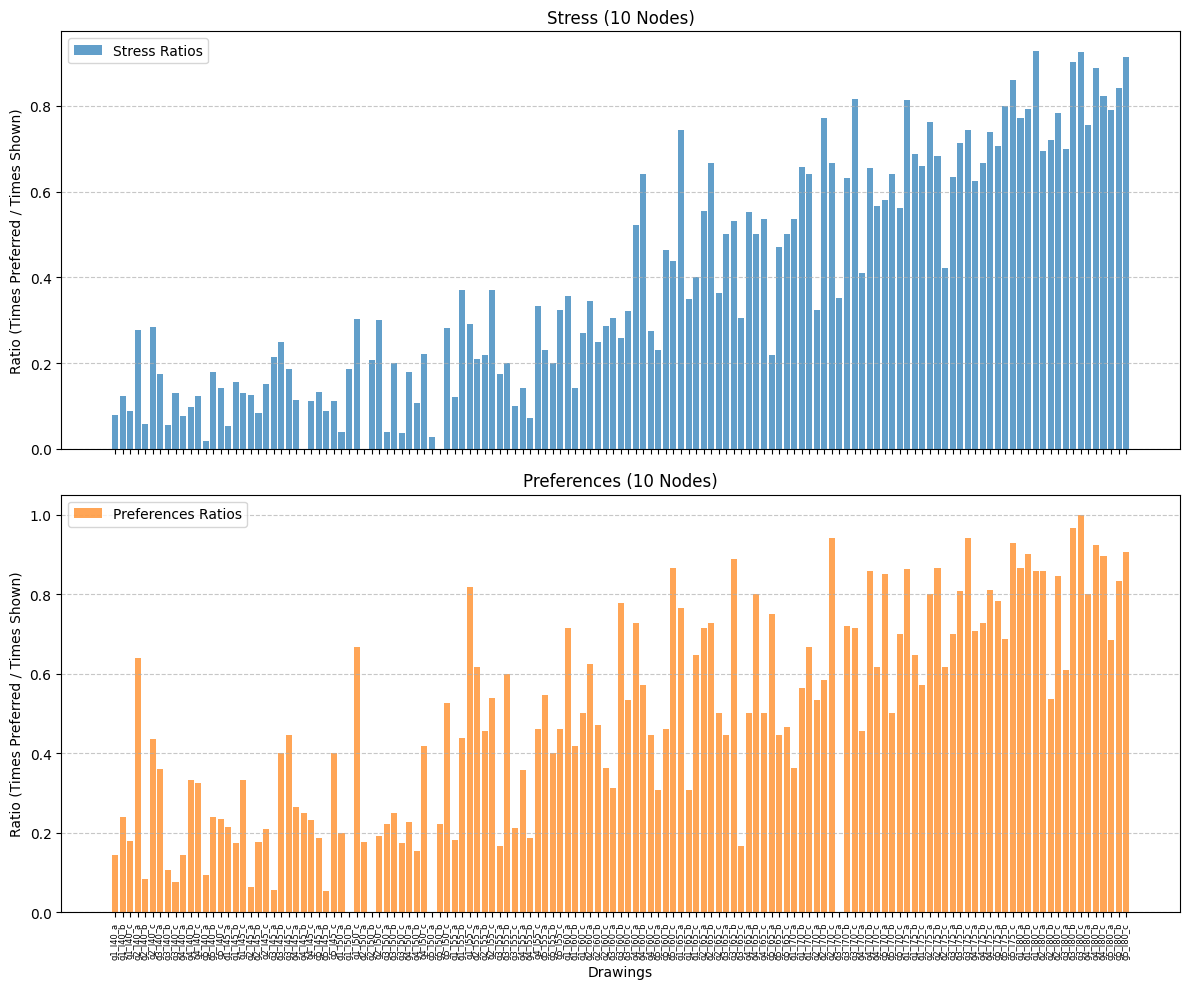

KS Test Statistic: 0.2074074074074074, p-value: 0.005888812531849538
Mann-Whitney U Statistic: 7162.0, p-value: 0.0023682851250579726
Anderson-Darling Statistic: 5.449686849864164, Significance: 0.002401113861780177
Chi-Square Statistic: 34.92936507936508, p-value: 6.131702845607923e-05
Kruskal-Wallis Test Statistic: 9.244402072643453, p-value: 0.0023621641337513307


In [24]:
# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

datasets = [stress10_df, nt_stress10_df, ex_stress10_df]

preferences_dict_10 = {key: {"total": 0, "times_chosen": 0} for key in keys}
stress_dict_10 = {key: {"total": 0, "times_chosen": 0} for key in keys}
# Generate and plot the heatmaps
for df in datasets:

    # Populate matrix_dict with the current dataframe
    for index, row in df.iterrows():
        drawings = eval(row['drawings'])  # Convert string to list of pairs
        
        for i, pair in enumerate(drawings):
            # Update the 'total' for both drawings in the pair
            for drawing in pair:
                stress_dict_10[drawing]['total'] += 1

            # Update the 'times_chosen' for the selected drawing
            if row['answers'][i] == 1:
                stress_dict_10[pair[0]]['times_chosen'] += 1  # First drawing selected
            elif row['answers'][i] == 3:
                stress_dict_10[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Populate matrix_dict with the current dataframe
for index, row in preference10_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            preferences_dict_10[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            preferences_dict_10[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            preferences_dict_10[pair[1]]['times_chosen'] += 1  # Second drawing selected



stress_keys = list(stress_dict_10.keys())
stress_ratios = [
    stress_dict_10[key]["times_chosen"] / stress_dict_10[key]["total"]
    if stress_dict_10[key]["total"] > 0 else 0
    for key in stress_keys
]

preferences_keys = list(preferences_dict_10.keys())
preferences_ratios = [
    preferences_dict_10[key]["times_chosen"] / preferences_dict_10[key]["total"]
    if preferences_dict_10[key]["total"] > 0 else 0
    for key in preferences_keys
]

# Create the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axes[0].bar(np.arange(len(stress_keys)), stress_ratios, alpha=0.7, color="tab:blue", label="Stress Ratios")
axes[0].set_ylabel("Ratio (Times Preferred / Times Shown)")
axes[0].set_title("Stress (10 Nodes)")
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(np.arange(len(preferences_keys)), preferences_ratios, alpha=0.7, color="tab:orange", label="Preferences Ratios")
axes[1].set_xlabel("Drawings")
axes[1].set_ylabel("Ratio (Times Preferred / Times Shown)")
axes[1].set_title("Preferences (10 Nodes)")
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Set shared x-axis labels
x_ticks = np.arange(len(stress_keys))
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(stress_keys, rotation=90, fontsize=6)

plt.tight_layout()
plt.show()

from scipy.stats import ks_2samp

# Perform the KS test
ks_stat, ks_pvalue = ks_2samp(stress_ratios, preferences_ratios)
print(f"KS Test Statistic: {ks_stat}, p-value: {ks_pvalue}")

from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
mw_stat, mw_pvalue = mannwhitneyu(stress_ratios, preferences_ratios, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {mw_stat}, p-value: {mw_pvalue}")

from scipy.stats import anderson_ksamp

# Perform the Anderson-Darling test
ad_stat, ad_critical, ad_significance = anderson_ksamp([stress_ratios, preferences_ratios])
print(f"Anderson-Darling Statistic: {ad_stat}, Significance: {ad_significance}")

import numpy as np
from scipy.stats import chisquare

# Bin the data into categories
bins = np.linspace(0, 1, 11)  # 10 bins from 0 to 1
stress_hist, _ = np.histogram(stress_ratios, bins)
preferences_hist, _ = np.histogram(preferences_ratios, bins)

# Perform the Chi-Square test
chi_stat, chi_pvalue = chisquare(stress_hist, f_exp=preferences_hist)
print(f"Chi-Square Statistic: {chi_stat}, p-value: {chi_pvalue}")

from scipy.stats import kruskal

stat, p_value = kruskal(stress_ratios, preferences_ratios)
print(f"Kruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")


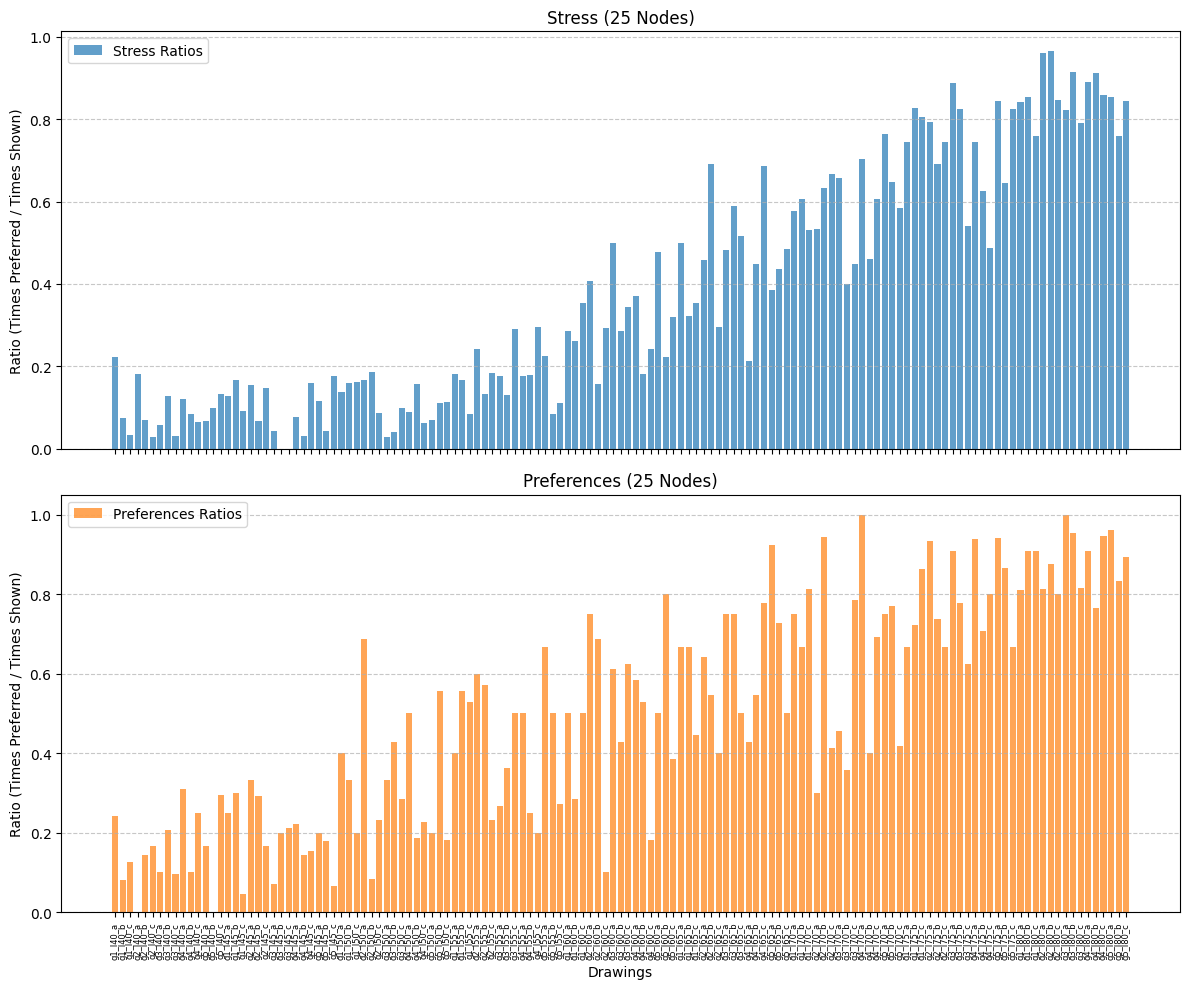

KS Test Statistic: 0.25925925925925924, p-value: 0.00021374773815717517
Mann-Whitney U Statistic: 6747.5, p-value: 0.00022787506642412924
Anderson-Darling Statistic: 8.99919032892827, Significance: 0.001
Chi-Square Statistic: 78.02044513457555, p-value: 3.992500935918524e-13


C:\Users\User\AppData\Local\Temp\ipykernel_33028\3635472069.py:103: UserWarning: p-value floored: true value smaller than 0.001
  ad_stat, ad_critical, ad_significance = anderson_ksamp([stress_ratios, preferences_ratios])


In [22]:
# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

datasets = [stress25_df, nt_stress25_df, ex_stress25_df]

preferences_dict_25 = {key: {"total": 0, "times_chosen": 0} for key in keys}
stress_dict_25 = {key: {"total": 0, "times_chosen": 0} for key in keys}
# Generate and plot the heatmaps
for df in datasets:

    # Populate matrix_dict with the current dataframe
    for index, row in df.iterrows():
        drawings = eval(row['drawings'])  # Convert string to list of pairs
        
        for i, pair in enumerate(drawings):
            # Update the 'total' for both drawings in the pair
            for drawing in pair:
                stress_dict_25[drawing]['total'] += 1

            # Update the 'times_chosen' for the selected drawing
            if row['answers'][i] == 1:
                stress_dict_25[pair[0]]['times_chosen'] += 1  # First drawing selected
            elif row['answers'][i] == 3:
                stress_dict_25[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Populate matrix_dict with the current dataframe
for index, row in preference25_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            preferences_dict_25[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            preferences_dict_25[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            preferences_dict_25[pair[1]]['times_chosen'] += 1  # Second drawing selected



stress_keys = list(stress_dict_25.keys())
stress_ratios = [
    stress_dict_25[key]["times_chosen"] / stress_dict_25[key]["total"]
    if stress_dict_25[key]["total"] > 0 else 0
    for key in stress_keys
]

preferences_keys = list(preferences_dict_25.keys())
preferences_ratios = [
    preferences_dict_25[key]["times_chosen"] / preferences_dict_25[key]["total"]
    if preferences_dict_25[key]["total"] > 0 else 0
    for key in preferences_keys
]

# Create the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axes[0].bar(np.arange(len(stress_keys)), stress_ratios, alpha=0.7, color="tab:blue", label="Stress Ratios")
axes[0].set_ylabel("Ratio (Times Preferred / Times Shown)")
axes[0].set_title("Stress (25 Nodes)")
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(np.arange(len(preferences_keys)), preferences_ratios, alpha=0.7, color="tab:orange", label="Preferences Ratios")
axes[1].set_xlabel("Drawings")
axes[1].set_ylabel("Ratio (Times Preferred / Times Shown)")
axes[1].set_title("Preferences (25 Nodes)")
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Set shared x-axis labels
x_ticks = np.arange(len(stress_keys))
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(stress_keys, rotation=90, fontsize=6)

plt.tight_layout()
plt.show()


from scipy.stats import ks_2samp

# Perform the KS test
ks_stat, ks_pvalue = ks_2samp(stress_ratios, preferences_ratios)
print(f"KS Test Statistic: {ks_stat}, p-value: {ks_pvalue}")

from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
mw_stat, mw_pvalue = mannwhitneyu(stress_ratios, preferences_ratios, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {mw_stat}, p-value: {mw_pvalue}")

from scipy.stats import anderson_ksamp

# Perform the Anderson-Darling test
ad_stat, ad_critical, ad_significance = anderson_ksamp([stress_ratios, preferences_ratios])
print(f"Anderson-Darling Statistic: {ad_stat}, Significance: {ad_significance}")

import numpy as np
from scipy.stats import chisquare

# Bin the data into categories
bins = np.linspace(0, 1, 11)  # 10 bins from 0 to 1
stress_hist, _ = np.histogram(stress_ratios, bins)
preferences_hist, _ = np.histogram(preferences_ratios, bins)

# Perform the Chi-Square test
chi_stat, chi_pvalue = chisquare(stress_hist, f_exp=preferences_hist)
print(f"Chi-Square Statistic: {chi_stat}, p-value: {chi_pvalue}")

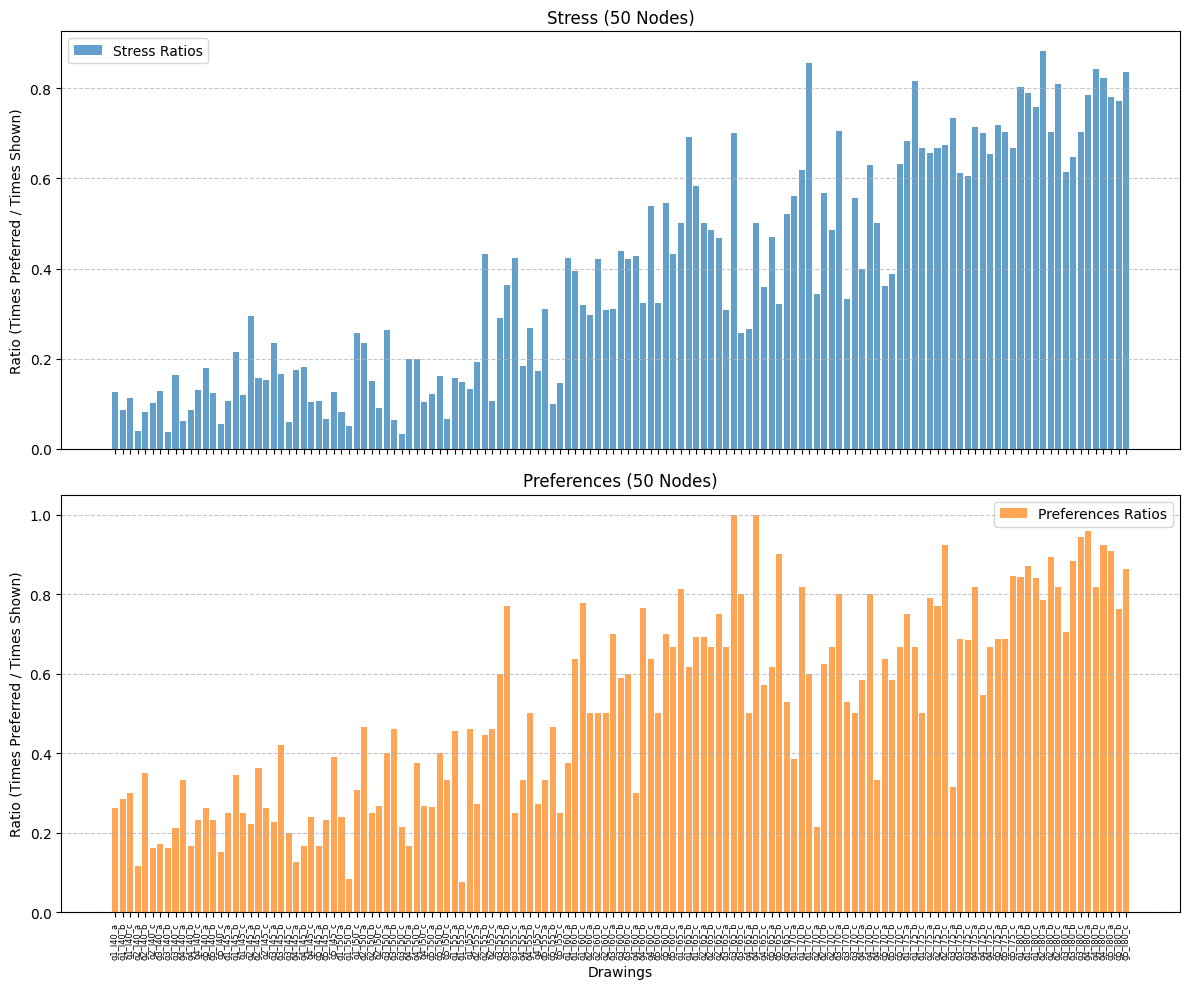

KS Test Statistic: 0.25925925925925924, p-value: 0.00021374773815717517
Mann-Whitney U Statistic: 6457.5, p-value: 3.502577621743311e-05
Anderson-Darling Statistic: 12.126552674310753, Significance: 0.001
Chi-Square Statistic: 151.98148148148147, p-value: 3.4265393661688972e-28


C:\Users\User\AppData\Local\Temp\ipykernel_33028\79142695.py:102: UserWarning: p-value floored: true value smaller than 0.001
  ad_stat, ad_critical, ad_significance = anderson_ksamp([stress_ratios, preferences_ratios])


In [23]:
# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

datasets = [stress50_df, nt_stress50_df, ex_stress50_df]

preferences_dict_50 = {key: {"total": 0, "times_chosen": 0} for key in keys}
stress_dict_50 = {key: {"total": 0, "times_chosen": 0} for key in keys}
# Generate and plot the heatmaps
for df in datasets:

    # Populate matrix_dict with the current dataframe
    for index, row in df.iterrows():
        drawings = eval(row['drawings'])  # Convert string to list of pairs
        
        for i, pair in enumerate(drawings):
            # Update the 'total' for both drawings in the pair
            for drawing in pair:
                stress_dict_50[drawing]['total'] += 1

            # Update the 'times_chosen' for the selected drawing
            if row['answers'][i] == 1:
                stress_dict_50[pair[0]]['times_chosen'] += 1  # First drawing selected
            elif row['answers'][i] == 3:
                stress_dict_50[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Populate matrix_dict with the current dataframe
for index, row in preference50_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            preferences_dict_50[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            preferences_dict_50[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            preferences_dict_50[pair[1]]['times_chosen'] += 1  # Second drawing selected



stress_keys = list(stress_dict_50.keys())
stress_ratios = [
    stress_dict_50[key]["times_chosen"] / stress_dict_50[key]["total"]
    if stress_dict_50[key]["total"] > 0 else 0
    for key in stress_keys
]

preferences_keys = list(preferences_dict_50.keys())
preferences_ratios = [
    preferences_dict_50[key]["times_chosen"] / preferences_dict_50[key]["total"]
    if preferences_dict_50[key]["total"] > 0 else 0
    for key in preferences_keys
]

# Create the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axes[0].bar(np.arange(len(stress_keys)), stress_ratios, alpha=0.7, color="tab:blue", label="Stress Ratios")
axes[0].set_ylabel("Ratio (Times Preferred / Times Shown)")
axes[0].set_title("Stress (50 Nodes)")
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(np.arange(len(preferences_keys)), preferences_ratios, alpha=0.7, color="tab:orange", label="Preferences Ratios")
axes[1].set_xlabel("Drawings")
axes[1].set_ylabel("Ratio (Times Preferred / Times Shown)")
axes[1].set_title("Preferences (50 Nodes)")
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Set shared x-axis labels
x_ticks = np.arange(len(stress_keys))
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(stress_keys, rotation=90, fontsize=6)

plt.tight_layout()
plt.show()

from scipy.stats import ks_2samp

# Perform the KS test
ks_stat, ks_pvalue = ks_2samp(stress_ratios, preferences_ratios)
print(f"KS Test Statistic: {ks_stat}, p-value: {ks_pvalue}")

from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
mw_stat, mw_pvalue = mannwhitneyu(stress_ratios, preferences_ratios, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {mw_stat}, p-value: {mw_pvalue}")

from scipy.stats import anderson_ksamp

# Perform the Anderson-Darling test
ad_stat, ad_critical, ad_significance = anderson_ksamp([stress_ratios, preferences_ratios])
print(f"Anderson-Darling Statistic: {ad_stat}, Significance: {ad_significance}")

import numpy as np
from scipy.stats import chisquare

# Bin the data into categories
bins = np.linspace(0, 1, 11)  # 10 bins from 0 to 1
stress_hist, _ = np.histogram(stress_ratios, bins)
preferences_hist, _ = np.histogram(preferences_ratios, bins)

# Perform the Chi-Square test
chi_stat, chi_pvalue = chisquare(stress_hist, f_exp=preferences_hist)
print(f"Chi-Square Statistic: {chi_stat}, p-value: {chi_pvalue}")